In [1]:
import pandas as pd

df_suppfig1_1 = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2c", index_col=0)
df_suppfig1_2 = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2d", index_col=0)
df_suppfig1_3 = pd.read_excel("./source_data/41592_2023_2148_MOESM5_ESM.xlsx", sheet_name="Fig2e", index_col=0)

p = 5.4497e-30


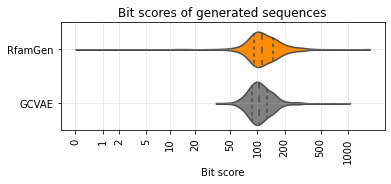

In [6]:
# plot scatter 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

color_gcvae = "gray"    
color_cmvae = "darkorange"


def transform(x): return np.log2(x - min(df_suppfig1_1["RfamGen"]) + 1)

data_cmvae = transform(df_suppfig1_1["RfamGen"])
data_gcvae = transform(df_suppfig1_1["GCVAE"])

u,p = wilcoxon(
    df_suppfig1_1["RfamGen"],
    df_suppfig1_1["GCVAE"],
    alternative = "greater"
    )
print(f"p = {p:.4e}")
df_diff = pd.DataFrame({
    "RfamGen": transform(df_suppfig1_1["RfamGen"]),
    "GCVAE": transform(df_suppfig1_1["GCVAE"]),
}).melt(var_name="model", value_name="Bit score")


fig, ax1 = plt.subplots(figsize = (6, 3))
sns.violinplot(data = df_diff, y = "model", x = "Bit score", cut = 0, inner = "quartile", saturation = 1, palette = [color_cmvae, color_gcvae])

plt.title("Bit scores of generated sequences")
plt.ylabel("")
plt.grid(alpha = 0.3)
plt.subplots_adjust(top = 0.8, bottom = 0.3, left = 0.2, right = 0.95)

ticks = np.array([0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]);
plt.xticks(np.log2(ticks +1) , ticks ,rotation=90);
plt.savefig(f"./supplefig1_1.pdf", transparent = True)


In [3]:
df_suppfig1_2.head(2)

,natural,GCVAE,RfamGen
rfam,,,
RF00001,81.115,140.108,173.546
RF00002,99.078,175.398,232.016


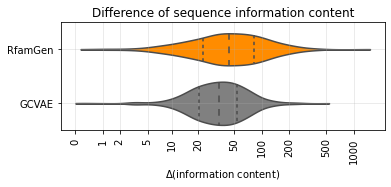

In [4]:
from scipy.stats import mannwhitneyu

df_diff = pd.DataFrame({
    "RfamGen": np.log2(np.abs(df_suppfig1_2["RfamGen"] - df_suppfig1_2["natural"]) + 1),
    "GCVAE": np.log2(np.abs(df_suppfig1_2["GCVAE"] - df_suppfig1_2["natural"]) + 1),
}).melt(var_name="model", value_name="$\Delta$(information content)")
u, p = mannwhitneyu(
    df_suppfig1_2["RfamGen"] - df_suppfig1_2["natural"],
    df_suppfig1_2["GCVAE"] - df_suppfig1_2["natural"],
    alternative="greater"
    )

plt.figure(figsize = (6,3))
sns.violinplot(data = df_diff, y = "model", x = "$\Delta$(information content)", cut = 0, inner = "quartile", saturation = 1, palette = [color_cmvae, color_gcvae])

ticks = np.array([0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xticks(np.log2(ticks +1) , ticks ,rotation=90)

plt.ylabel("")
plt.grid(alpha = 0.3)
plt.title("Difference of sequence information content")
plt.subplots_adjust(top = 0.8, bottom = 0.3, left = 0.2, right = 0.95)
plt.savefig(f"./supplefig1_2.pdf", transparent = True)


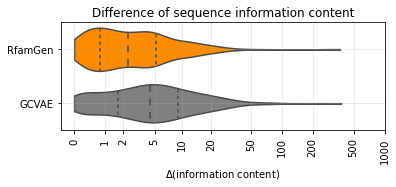

In [7]:
from scipy.stats import mannwhitneyu

df_diff = pd.DataFrame({
    "RfamGen": np.log2(np.abs(df_suppfig1_3["RfamGen"] - df_suppfig1_3["natural"]) + 1),
    "GCVAE": np.log2(np.abs(df_suppfig1_3["GCVAE"] - df_suppfig1_3["natural"]) + 1),
}).melt(var_name="model", value_name="$\Delta$(information content)")
u, p = mannwhitneyu(
    df_suppfig1_3["RfamGen"] - df_suppfig1_3["natural"],
    df_suppfig1_3["GCVAE"] - df_suppfig1_3["natural"],
    alternative="greater"
    )

plt.figure(figsize = (6,3))
sns.violinplot(data = df_diff, y = "model", x = "$\Delta$(information content)", cut = 0, inner = "quartile", saturation = 1, palette = [color_cmvae, color_gcvae])

ticks = np.array([0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
plt.xticks(np.log2(ticks +1) , ticks ,rotation=90)

plt.ylabel("")
plt.grid(alpha = 0.3)
plt.title("Difference of sequence information content")
plt.subplots_adjust(top = 0.8, bottom = 0.3, left = 0.2, right = 0.95)
plt.savefig(f"./supplefig1_3.pdf", transparent = True)

